# Nonlinear equations

> A linear function f (x) by definition satisfies additivity f (x+y) = f (x)+f (y) and
homogeneity f (αx) = αf (x), which can be written together as the superposition principle
f (αx+βy) = αf (x)+βf (y). This gives a precise definition of linearity

A nonlinear function,
in contrast, is a function that does not satisfy these conditions. Nonlinearity is therefore
a much broader concept, and a function can be nonlinear in many different ways

In [1]:
from scipy import linalg as la
from scipy import optimize

### Sympy, Numpy, Matplotlib

In [2]:
import sympy
sympy.init_printing()

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

from mpl_toolkits.mplot3d.axes3d import Axes3D

For example, to solve the standard quadratic
equation, we define an expression for the equation and pass it to the sympy.
solve function

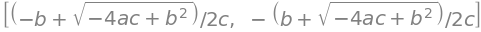

In [3]:
# Define quadratic terms
x, a, b, c = sympy.symbols("x, a, b, c")

sympy.solve(a + b*x + c*x**2, x)

> The solution is indeed the well-known formula for the solution of this equation. The
same method can be used to solve some trigonometric equations

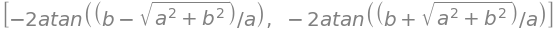

In [4]:
sympy.solve(a * sympy.cos(x) - b * sympy.sin(x), x)

> However, in general nonlinear equations are typically not solvable analytically. For
example, equations that contain both polynomial expressions and elementary functions,
such as sinx = x, are often transcendental and do not have an algebraic solution. If we
attempt to solve such an equation using SymPy, we obtain an error in the form of an
exception

In [5]:
sympy.solve(sympy.sin(x)-x, x)

NotImplementedError: multiple generators [x, sin(x)]
No algorithms are implemented to solve equation -x + sin(x)

> Solve it numerically and visualise

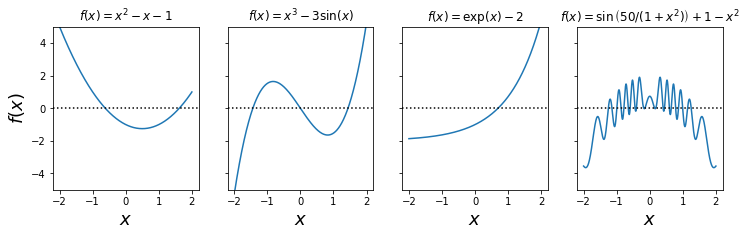

In [6]:
x = np.linspace(-2, 2, 1000)
# four examples of nonlinear functions

f1 = x**2 - x - 1
f2 = x**3 - 3 * np.sin(x)
f3 = np.exp(x) - 2
f4 = 1 - x**2 + np.sin(50 / (1 + x**2))

# plot each function
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)

for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f, lw=1.5)
    axes[n].axhline(0, ls=':', color='k')
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)

axes[0].set_ylabel(r'$f(x)$', fontsize=18)

titles = [
    r'$f(x)=x^2-x-1$',
    r'$f(x)=x^3-3\sin(x)$',
    r'$f(x)=\exp(x)-2$',
    r'$f(x)=\sin\left(50/(1+x^2)\right)+1-x^2$'
]

for n, title in enumerate(titles):
    axes[n].set_title(title)


### Graphical visualization of how the bisection method works

Text(0.5, 1.0, 'Bisection method')

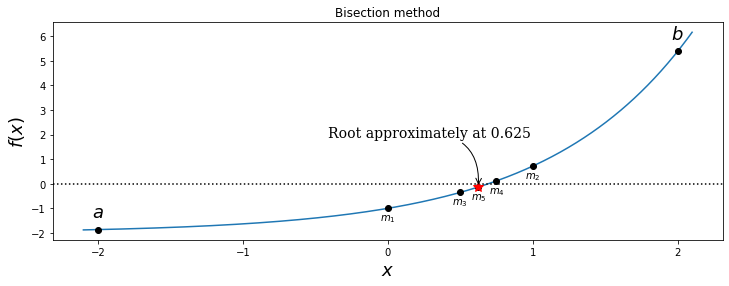

In [17]:
# define a function, desired tolerance and starting interval [a, b]
f = lambda x: np.exp(x) - 2
tol = 0.2
a, b = -2, 2
x = np.linspace(-2.1, 2.1, 1000)

# graph the function f
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(x, f(x), lw=1.5)

ax.axhline(0, ls=':', color='k')

ax.set_xticks([-2, -1, 0, 1, 2])

ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x)$', fontsize=18)

# find the root using the bisection method and visualize
# the steps in the method in the graph
fa, fb = f(a), f(b)

# Draw the dots on the graph
ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa + 0.5, r"$a$", ha='center', fontsize=18)
ax.text(b, fb + 0.5, r"$b$", ha='center', fontsize=18)

n = 1
while b - a > tol:
    m = a + (b - a)/2
    fm = f(m)
    ax.plot(m, fm, 'ko')
    ax.text(m, fm - 0.5, r"$m_%d$" % n, ha='center')
    if np.sign(fa) == np.sign(fm):
        a, fa = m, fm
    else:
        b, fb = m, fm
    n += 1
        
        
ax.plot(m, fm, 'r*', markersize=10)
ax.annotate("Root approximately at %.3f" % m,
            fontsize=14, family="serif",
            xy=(a, fm), xycoords='data',
            xytext=(-150, +50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3, rad=-.5"))
ax.set_title("Bisection method")

> Another standard method for root finding is Newton’s method, which converges
faster than the bisection method discussed in the previous paragraph. While the
bisection method only uses the sign of the function at each point, Newton’s method uses
the actual function values to obtain a more accurate approximation of the nonlinear
function. In particular, it approximates the function f (x) with its first-order Taylor
expansion f (x+dx) = f (x)+dx f ′(x), which is a linear function whose root is easily found
to be x – f (x)/f ′(x). Of course, this does not need to be a root of the function f(x), but in
many cases it is a good approximation for getting closer to a root of f (x). By iterating this
scheme, xk+1 = xk − f (xk)/f ′(xk), we may approach the root of the function. A potential
problem with this method is that it fails if f ′(xk) is zero at some point xk. This special
case would have to be dealt with in a real implementation of this method

### Visualization of the root-finding steps in Newton’s method for the equation exp(x) − 2 = 0

#### Create function and make derivative

In [11]:
s_x = sympy.symbols("x")
# equation
s_f = sympy.exp(s_x) - 2

s_diff_x = sympy.diff(s_f, s_x)

# function and derivative
s_f, s_diff_x

### Secant method

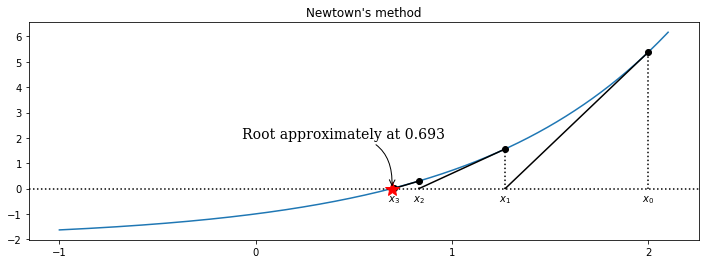

In [29]:
# define a function, desired tolerance and starting point xk
tol = 0.01
xk = 2

# numpy lambda function
f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)

# numpy lambda derivative of function (f prime)
fp = lambda x: sympy.lambdify(s_x, s_diff_x, 'numpy')(x)

x = np.linspace(-1, 2.1, 1000)

# setup a graph for visualizing the root finding steps
fig, ax = plt.subplots(1, 1, figsize=(12, 4))

# plot the function
ax.plot(x, f(x))
# make horyzontal line parallel to x-axes
ax.axhline(0, ls=':', color='k')

# iterate Newton's method until convergence to the desired tolerance has been reached

n = 0
while f(xk) > tol:
    xk_new = xk - f(xk) / fp(xk)
    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d$' % n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')
    xk = xk_new
    n += 1
    
ax.plot(xk, f(xk), 'r*', markersize=15)

ax.annotate("Root approximately at %.3f" % xk,
            fontsize=14, family="serif",
            xy=(xk, f(xk)), xycoords='data',
            xytext=(-150, +50), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3, rad=-.5"))

ax.set_title("Newtown's method")
ax.set_xticks([-1, 0, 1, 2])

> iterate Newton's method until convergence to the desired tolerance has been reached

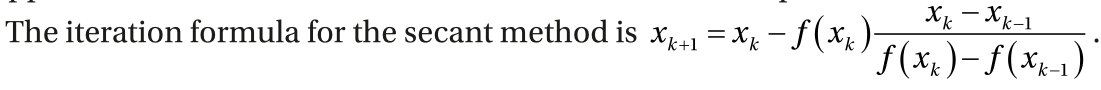

> The SciPy optimize module provides multiple functions for numerical root finding.
The optimize.bisect and optimize.newton functions implement variants of bisection
and Newton methods. The optimize.bisect takes three arguments: first a Python
function (e.g., a lambda function) that represents the mathematical function for the
equation for which a root is to be calculated and the second and third arguments are the
lower and upper values of the interval for which to perform the bisection method. Note
that the sign of the function has to be different at the points a and b for the bisection
method to work, as discussed earlier. Using the optimize.bisect function, we can
calculate the root of the equation exp(x) − 2 = 0 that we used in the previous examples,
using

In [26]:
optimize.bisect(f, -2, 2)

In [31]:
x_root_guess = 2
optimize.newton(f, x_root_guess)

> Optionally, it also takes an argument for specifying the derivative
of the function, using the fprime keyword argument. If fprime is given, Newton’s
method is used; otherwise the secant method is used instead

In [35]:
optimize.newton(f, x_root_guess, fprime=fp)

> The SciPy optimize module provides additional functions for root finding. In
particular, the optimize.brentq and optimize.brenth functions, which are variants of
the bisection method, also work on an interval where the function changes sign. The optimize.brentq function is generally considered the preferred all-around root-finding
function in SciPy. To find a root of the same equation that we considered previously,
using optimize.brentq and optimize.brenth functions, we can use

In [36]:
optimize.brentq(lambda x: np.exp(x) - 2, -2, 2)

In [37]:
optimize.brenth(lambda x: np.exp(x) - 2, -2, 2)

> Note that these two functions take a Python function for the equation as the first
argument and the lower and upper values of the sign-changing interval as the second
and third arguments.